In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [82]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/Used_Bikes.csv')

In [83]:
df

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,First Owner,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,First Owner,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,First Owner,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


<ipython-input-85-d136c3245852>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = df.corr()


<Axes: >

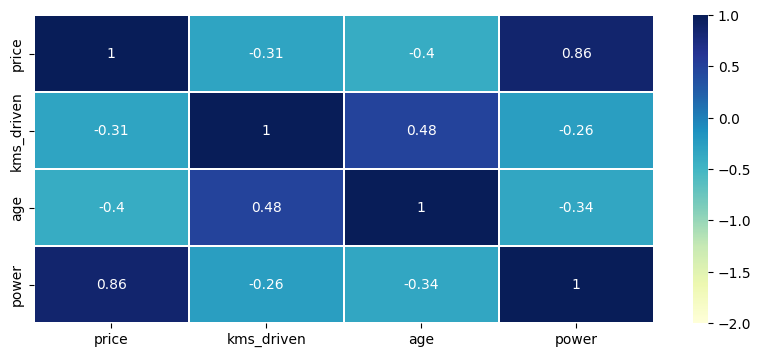

In [85]:
corrmatrix = df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True,linewidths=0.2,cmap='YlGnBu')

In [86]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [87]:
df.columns

Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand'],
      dtype='object')

In [88]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [89]:
df.dtypes

bike_name      object
price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [90]:
df.drop(['bike_name','city','kms_driven'],axis=1,inplace=True)

In [91]:
df.columns

Index(['price', 'owner', 'age', 'power', 'brand'], dtype='object')

In [92]:
df

,price,owner,age,power,brand
0,35000.0,First Owner,3.0,110.0,TVS
1,119900.0,First Owner,4.0,350.0,Royal Enfield
2,600000.0,First Owner,8.0,675.0,Triumph
3,65000.0,First Owner,4.0,180.0,TVS
4,80000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...
32643,39000.0,First Owner,4.0,100.0,Hero
32644,30000.0,First Owner,9.0,180.0,TVS
32645,60000.0,First Owner,6.0,220.0,Bajaj
32646,15600.0,First Owner,16.0,125.0,Hero


In [93]:
df['brand'].unique()

array(['TVS', 'Royal Enfield', 'Triumph', 'Yamaha', 'Honda', 'Hero',
       'Bajaj', 'Suzuki', 'Benelli', 'KTM', 'Mahindra', 'Kawasaki',
       'Ducati', 'Hyosung', 'Harley-Davidson', 'Jawa', 'BMW', 'Indian',
       'Rajdoot', 'LML', 'Yezdi', 'MV', 'Ideal'], dtype=object)

In [94]:
df['brand']=df['brand'].replace({'TVS':1})
df['brand']=df['brand'].replace({'Royal Enfield':2})
df['brand']=df['brand'].replace({'Triumph':3})
df['brand']=df['brand'].replace({'Yamaha':4})
df['brand']=df['brand'].replace({'Honda':5})
df['brand']=df['brand'].replace({'Hero':6})
df['brand']=df['brand'].replace({'Bajaj':7})
df['brand']=df['brand'].replace({'Suzuki':8})
df['brand']=df['brand'].replace({'Benelli':9})
df['brand']=df['brand'].replace({'KTM':10})
df['brand']=df['brand'].replace({'Mahindra':11})
df['brand']=df['brand'].replace({'Kawasaki':12})
df['brand']=df['brand'].replace({'Ducati':13})
df['brand']=df['brand'].replace({'Hyosung':14})
df['brand']=df['brand'].replace ({'Harley-Davidson':15})
df['brand']=df['brand'].replace({'Jawa':16})
df['brand']=df['brand'].replace({'BMW':17})
df['brand']=df['brand'].replace({'Indian':18})
df['brand']=df['brand'].replace({'Rajdoot':19})
df['brand']=df['brand'].replace({'LML':20})
df['brand']=df['brand'].replace({'Yezdi':21})
df['brand']=df['brand'].replace({'MV':22})
df['brand']=df['brand'].replace({'Ideal':23})

In [95]:
df

,price,owner,age,power,brand
0,35000.0,First Owner,3.0,110.0,1
1,119900.0,First Owner,4.0,350.0,2
2,600000.0,First Owner,8.0,675.0,3
3,65000.0,First Owner,4.0,180.0,1
4,80000.0,First Owner,3.0,150.0,4
...,...,...,...,...,...
32643,39000.0,First Owner,4.0,100.0,6
32644,30000.0,First Owner,9.0,180.0,1
32645,60000.0,First Owner,6.0,220.0,7
32646,15600.0,First Owner,16.0,125.0,6


In [96]:
df.dtypes

price    float64
owner     object
age      float64
power    float64
brand      int64
dtype: object

In [97]:
y=df['price']
x=df.drop(['price'],axis=1)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [100]:
x_test

,owner,age,power,brand
28994,First Owner,8.0,100.0,6
31433,First Owner,8.0,150.0,5
17250,First Owner,15.0,150.0,7
13738,First Owner,15.0,150.0,7
24577,First Owner,7.0,350.0,2
...,...,...,...,...
10877,First Owner,14.0,150.0,6
32314,First Owner,8.0,150.0,6
17122,First Owner,6.0,220.0,7
28334,First Owner,5.0,220.0,7


In [101]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth Owner Or More'], dtype=object)

In [102]:
df['owner']=df['owner'].replace({'First Owner':1})
df['owner']=df['owner'].replace({'Second Owner':2})
df['owner']=df['owner'].replace({'Third Owner':3})
df['owner']=df['owner'].replace({'Fourth Owner Or More':4})

In [103]:
df

,price,owner,age,power,brand
0,35000.0,1,3.0,110.0,1
1,119900.0,1,4.0,350.0,2
2,600000.0,1,8.0,675.0,3
3,65000.0,1,4.0,180.0,1
4,80000.0,1,3.0,150.0,4
...,...,...,...,...,...
32643,39000.0,1,4.0,100.0,6
32644,30000.0,1,9.0,180.0,1
32645,60000.0,1,6.0,220.0,7
32646,15600.0,1,16.0,125.0,6


In [104]:
df.dtypes


price    float64
owner      int64
age      float64
power    float64
brand      int64
dtype: object

In [105]:
y=df['price']
x=df.drop(['price'],axis=1)


In [106]:
from sklearn.model_selection import train_test_split


In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


In [108]:
x_test


,owner,age,power,brand
28994,1,8.0,100.0,6
31433,1,8.0,150.0,5
17250,1,15.0,150.0,7
13738,1,15.0,150.0,7
24577,1,7.0,350.0,2
...,...,...,...,...
10877,1,14.0,150.0,6
32314,1,8.0,150.0,6
17122,1,6.0,220.0,7
28334,1,5.0,220.0,7


In [109]:
y_test


28994     18000.0
31433     43000.0
17250     10000.0
13738     14227.0
24577     87000.0
           ...   
10877     11900.0
32314     25000.0
17122     60000.0
28334     80000.0
10536    105000.0
Name: price, Length: 8162, dtype: float64

In [110]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
pickle.dump(lr,open('model.pkl','wb'))


In [111]:
pre=model.predict(x_test)
pre


array([ 10973.11293559,  29542.7957066 ,  25786.23955582, ...,
        86804.9708955 ,  89513.65900815, 122258.40956009])

In [112]:
print(y_test)


28994     18000.0
31433     43000.0
17250     10000.0
13738     14227.0
24577     87000.0
           ...   
10877     11900.0
32314     25000.0
17122     60000.0
28334     80000.0
10536    105000.0
Name: price, Length: 8162, dtype: float64


In [113]:
print(pre)


[ 10973.11293559  29542.7957066   25786.23955582 ...  86804.9708955
  89513.65900815 122258.40956009]


In [114]:
from sklearn.metrics import mean_squared_error
print('mse error is :',mean_squared_error(y_test,pre))


mse error is : 1826123145.53395


In [115]:
df.columns


Index(['price', 'owner', 'age', 'power', 'brand'], dtype='object')

In [116]:
type(x_test)


pandas.core.frame.DataFrame

In [117]:
import pandas as pd

x=float(input('enter owner'))
y=float(input('enter vehicle age'))
x1=float(input('enter vechicle power'))
y1=float(input('enter vehicle brand'))

data=[[x,y,x1,y1]]
df=pd.DataFrame(data,columns=['owner','age','power','brand'])
a=model.predict(df)
print('bike price is :',a)

enter owner1
enter vehicle age14
enter vechicle power50
enter vehicle brand1
bike price is : [-69461.48042461]


In [118]:
print('bike price is :',a)


bike price is : [-69461.48042461]
